In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

API_KEY = 'CAZTM8BJUSGWXB33L8H3ZTDTD'

In [2]:
plik = 'england-premier-league-matches-2018-to-2019-stats.csv'
URL = "https://footystats.org/c-dl.php?type=matches&comp=1625"

if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    response = requests.get(URL)
    open(plik, "wb").write(response.content)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')


Plik england-premier-league-matches-2018-to-2019-stats.csv już jest na dysku


In [3]:
def f_to_celsius(fahrenheit):
    celsius = ((fahrenheit-32)*5)/9  
    return celsius

def weather_request_string(api_key, datetime, city):
    req = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city},UK/{datetime}?key={api_key}&include=current"
    return req

def request_weather(url):   
    response = requests.get(url)

    response_json = response.json()
    temperatureF = response_json['currentConditions']['temp']
    temperatureC = f_to_celsius(temperatureF)
    return temperatureC

In [4]:
df =  pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv', delimiter = ',', dtype = None, index_col=False)#, header=0, skiprows=[0])

selected_columns = ['date_GMT', 'home_team_name', 'away_team_name', 'home_team_possession', 'away_team_possession', 'home_team_goal_count', 'team_a_xg', 'home_team_fouls', 'away_team_fouls', 'home_team_shots_on_target', 'home_team_corner_count', 'home_ppg', 'Pre-Match PPG (Home)']

df = df[selected_columns]

pd.set_option('display.width', 500)
print(df.head())

to_weather = ['date_GMT', 'home_team_name', 'away_team_name', 'home_team_possession', 'away_team_possession', 'stadium_name']
weather_df = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv', delimiter = ',', dtype = None, index_col=False)
weather_df = weather_df[to_weather]


                date_GMT     home_team_name     away_team_name  home_team_possession  away_team_possession  home_team_goal_count  team_a_xg  home_team_fouls  away_team_fouls  home_team_shots_on_target  home_team_corner_count  home_ppg  Pre-Match PPG (Home)
0   Aug 10 2018 - 7:00pm  Manchester United     Leicester City                    46                    54                     2       1.25               11                8                          7                       2      1.89                   0.0
1  Aug 11 2018 - 11:30am   Newcastle United  Tottenham Hotspur                    40                    60                     1       1.18               11               12                          3                       3      1.32                   0.0
2   Aug 11 2018 - 2:00pm    AFC Bournemouth       Cardiff City                    62                    38                     2       1.50               11                9                          5                       7     

In [5]:
from datetime import datetime
import re

def convert_date_format(date_string):
    date_obj = datetime.strptime(date_string, '%b %d %Y - %I:%M%p')
    new_date_string = date_obj.strftime('%Y-%m-%dT%H:%M:%S')

    return new_date_string

def extract_value_from_parentheses(string):
    pattern = r"\((.*?)\)"

    match = re.search(pattern, string)
    if match:
        value = match.group(1)
        return value
    else:
        return None
    
man_city_df = pd.DataFrame(columns=['possession', 'weather'])
man_city_data = []

for index, row in weather_df.iterrows():
    home_team = row['home_team_name']
    away_team = row['away_team_name']
    if home_team == 'Manchester City' or away_team == 'Manchester City':
        date = convert_date_format(row['date_GMT'])
        city = extract_value_from_parentheses(row['stadium_name'])

        if home_team == 'Manchester City':
            poss = row['home_team_possession']
        else:
            poss = row['away_team_possession']
        
        req_str = weather_request_string(API_KEY, date, city)
        weather = request_weather(req_str)
        data = {'possession': poss, 'weather': weather}
        man_city_data.append(data)

man_city_df = pd.DataFrame(man_city_data)
print(man_city_df)

Index(['date_GMT', 'home_team_name', 'away_team_name', 'home_team_possession', 'away_team_possession', 'stadium_name'], dtype='object')
    possession    weather
0           58  19.555556
1           76  17.944444
2           72  14.833333
3           78  22.277778
4           64  16.000000
5           79  10.055556
6           80  14.888889
7           51  12.333333
8           69  16.388889
9           52   6.111111
10          67  12.333333
11          64  10.166667
12          70   9.055556
13          73  10.944444
14          71   6.611111
15          62  11.055556
16          67   0.722222
17          78   8.500000
18          67   9.333333
19          77   9.833333
20          49   1.111111
21          76   6.000000
22          68   3.166667
23          77   0.888889
24          58   4.833333
25          62   7.222222
26          55   5.611111
27          75   6.722222
28          82  11.277778
29          71   7.222222
30          66  18.055556
31          78   5.666667
32    

In [6]:
most_common = df['home_team_possession'].mode().values[0]
print("Najczęściej występująca wartość:", most_common)

least_common = df['home_team_possession'].value_counts().idxmin()
print("Najrzadziej występująca wartość:", least_common)

mean_value = df['home_team_possession'].mean()
print("Średnia wartość:", mean_value)

median_value = df['home_team_possession'].median()
print("Mediana:", median_value)

std_deviation = df['home_team_possession'].std()
print("Odchylenie standardowe:", std_deviation)

min_value = df['home_team_possession'].min()
max_value = df['home_team_possession'].max()
print("Wartość minimalna:", min_value)
print("Wartość maksymalna:", max_value)


Najczęściej występująca wartość: 62
Najrzadziej występująca wartość: 79
Średnia wartość: 51.14736842105263
Mediana: 51.0
Odchylenie standardowe: 13.83847141882203
Wartość minimalna: 18
Wartość maksymalna: 80


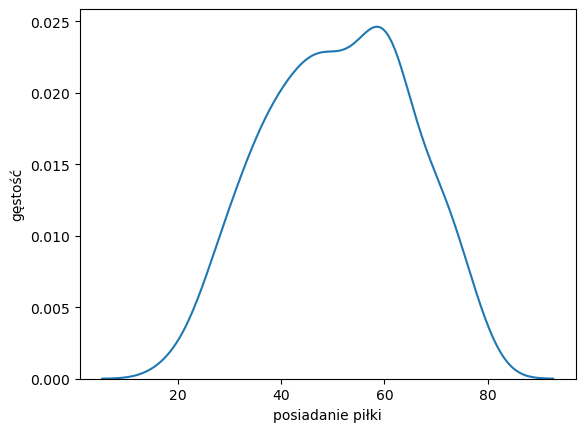

In [7]:
sns.kdeplot(df['home_team_possession'])
plt.xlabel('posiadanie piłki')
plt.ylabel('gęstość')
plt.show()

[Text(0, 0.5, 'Posiadanie piłki'),
 Text(0, 1.5, 'Liczba goli'),
 Text(0, 2.5, 'Wskaźnik oczekiwanych goli'),
 Text(0, 3.5, 'Strzały drużyny'),
 Text(0, 4.5, 'Poziom drużyny'),
 Text(0, 5.5, 'Liczba fauli przeciwnika'),
 Text(0, 6.5, 'Liczba rzutów rożnych')]

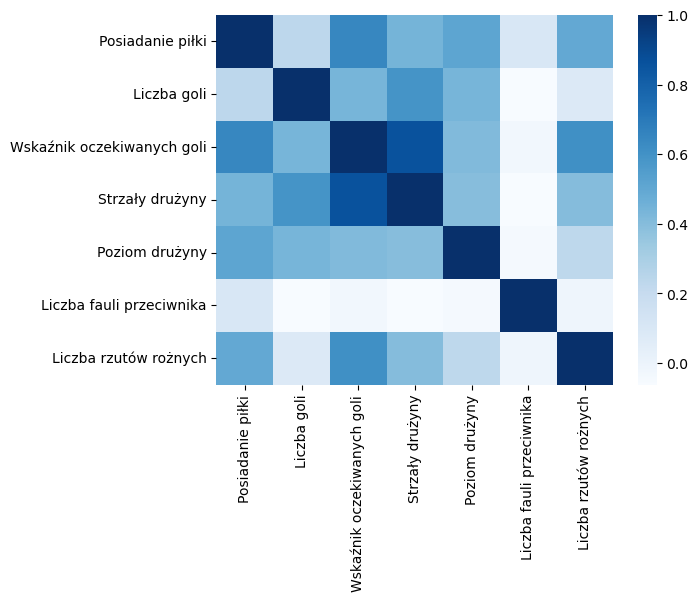

In [187]:
polish_labels = ['Posiadanie piłki', 'Liczba goli', 'Wskaźnik oczekiwanych goli', 'Strzały drużyny', 'Poziom drużyny', 'Liczba fauli przeciwnika', 'Liczba rzutów rożnych']

heatmap = sns.heatmap(df[['home_team_possession', "home_team_goal_count", 'team_a_xg', 'home_team_shots_on_target', 'home_ppg', 'away_team_fouls', 'home_team_corner_count']].corr(), cmap="Blues")
heatmap.set_xticklabels(polish_labels, rotation=90)
heatmap.set_yticklabels(polish_labels, rotation=0)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def draw_plot(X, Y, degree, x_axis_name, y_axis_name):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    model_lin = LinearRegression()
    model_lin.fit(X_train.reshape(-1,1), Y_train)
    x_axis = np.linspace(start=X.min(), stop=X.max(), num=300)
    y_axis_reglin = model_lin.predict(x_axis.reshape(-1,1))

    gen_features = PolynomialFeatures(degree=degree, include_bias=True, interaction_only=False)
    model_GLM = LinearRegression()
    model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)
    y_axis_GLM = model_GLM.predict(gen_features.fit_transform(x_axis.reshape(-1,1)))

    plt.figure(figsize=(10,7))
    plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
    plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
    plt.xlabel(x_axis_name, fontsize=14)
    plt.ylabel(y_axis_name, fontsize=14)
    plt.plot(x_axis, y_axis_reglin, label='model liniowy', color='tab:orange')
    plt.plot(x_axis, y_axis_GLM, label=f'model GLM', color='tab:red')
    plt.legend(fontsize=12, shadow=True, loc='upper left')
    plt.show()

    print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
    MSE_reglin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
    print(f'Błąd średniokwadratowy dla danych testowych: {MSE_reglin:0.3}\n')
    MSE_reglin_2 = mean_squared_error(Y_train, model_lin.predict(X_train.reshape(-1,1)))
    print(f'Błąd średniokwadratowy dla danych treningowych: {MSE_reglin_2:0.3}\n')

    print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
    MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
    print(f'Błąd średniokwadratowy dla danych testowych: {MSE_GLM:0.3}\n')
    MSE_GLM_2 = mean_squared_error(Y_train, model_lin.predict(X_train.reshape(-1,1)))
    print(f'Błąd średniokwadratowy dla danych treningowych: {MSE_GLM_2:0.3}\n')

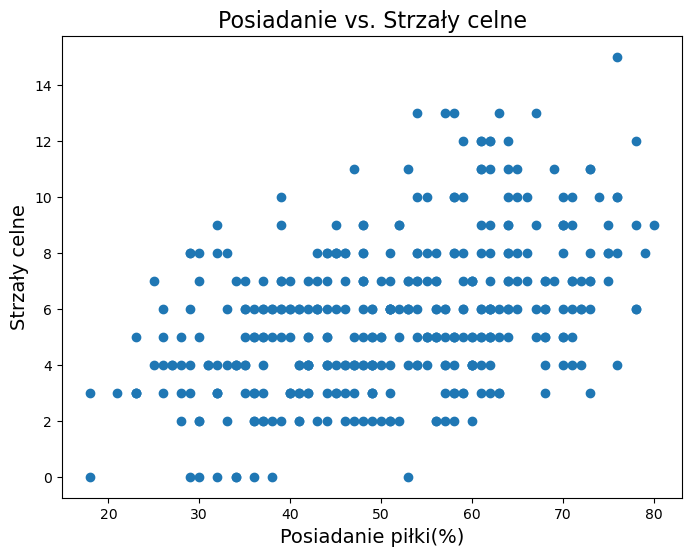

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df['home_team_possession'], df['home_team_shots_on_target'])
plt.xlabel('Posiadanie piłki(%)', fontsize=14)
plt.ylabel('Strzały celne', fontsize=14)
plt.title('Posiadanie vs. Strzały celne', fontsize=16)
plt.show()

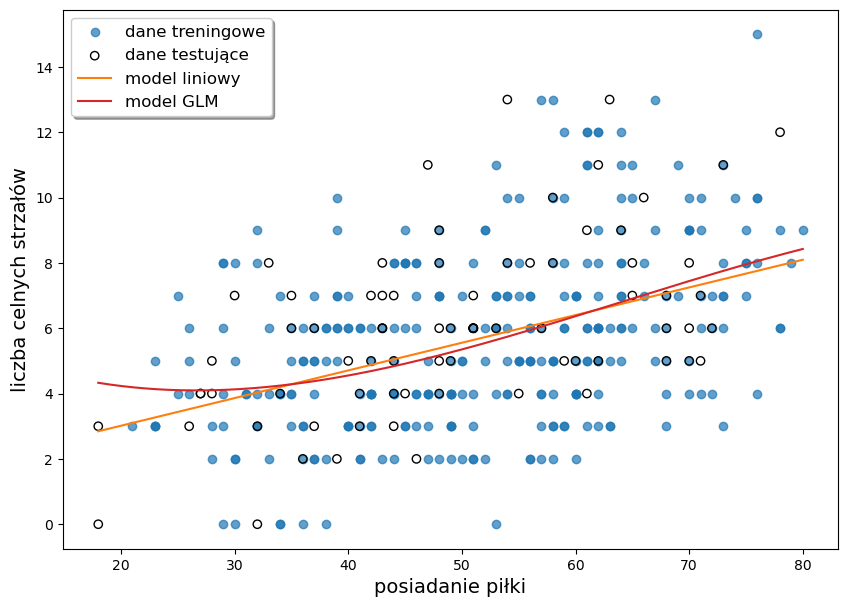

Parametry modelu liniowego: [0.08468], 1.32104
Błąd średniokwadratowy dla danych testowych: 5.34

Błąd średniokwadratowy dla danych treningowych: 6.06

Parametry modelu GLM: [ 0.     -0.2102  0.005  -0.    ], 6.65021
Błąd średniokwadratowy dla danych testowych: 5.61

Błąd średniokwadratowy dla danych treningowych: 6.06



In [80]:
draw_plot(df['home_team_possession'].values, df['home_team_shots_on_target'].values, 3, 'posiadanie piłki', 'liczba celnych strzałów')

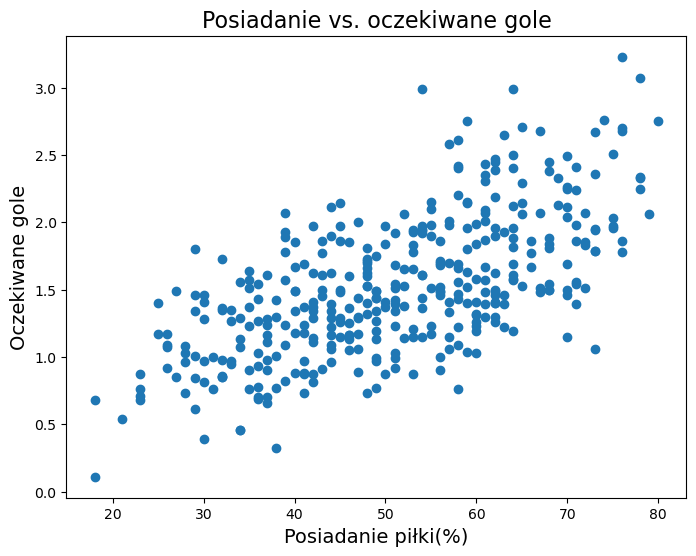

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['home_team_possession'], df['team_a_xg'])
plt.xlabel('Posiadanie piłki(%)', fontsize=14)
plt.ylabel('Oczekiwane gole', fontsize=14)
plt.title('Posiadanie vs. oczekiwane gole', fontsize=16)
plt.show()

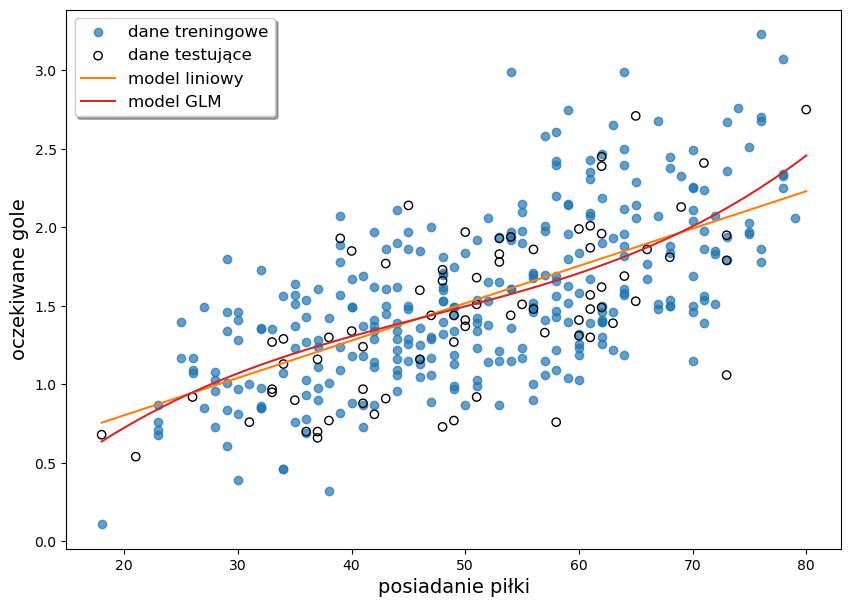

Parametry modelu liniowego: [0.02377], 0.32897
Błąd średniokwadratowy dla danych testowych: 0.15

Błąd średniokwadratowy dla danych treningowych: 0.16

Parametry modelu GLM: [ 0.      0.0908 -0.0015  0.    ], -0.56232
Błąd średniokwadratowy dla danych testowych: 0.149

Błąd średniokwadratowy dla danych treningowych: 0.16



In [42]:
draw_plot(df['home_team_possession'].values, df['team_a_xg'].values, 3, 'posiadanie piłki', 'oczekiwane gole')

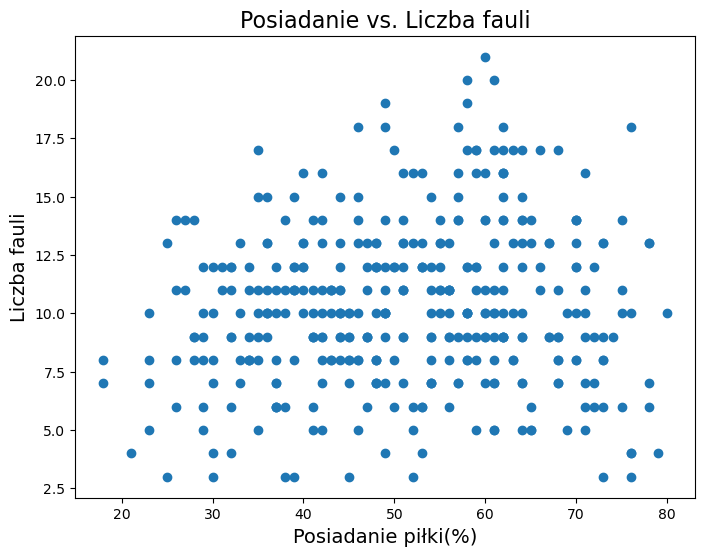

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(df['home_team_possession'], df['away_team_fouls'])
plt.xlabel('Posiadanie piłki(%)', fontsize=14)
plt.ylabel('Liczba fauli', fontsize=14)
plt.title('Posiadanie vs. Liczba fauli', fontsize=16)
plt.show()

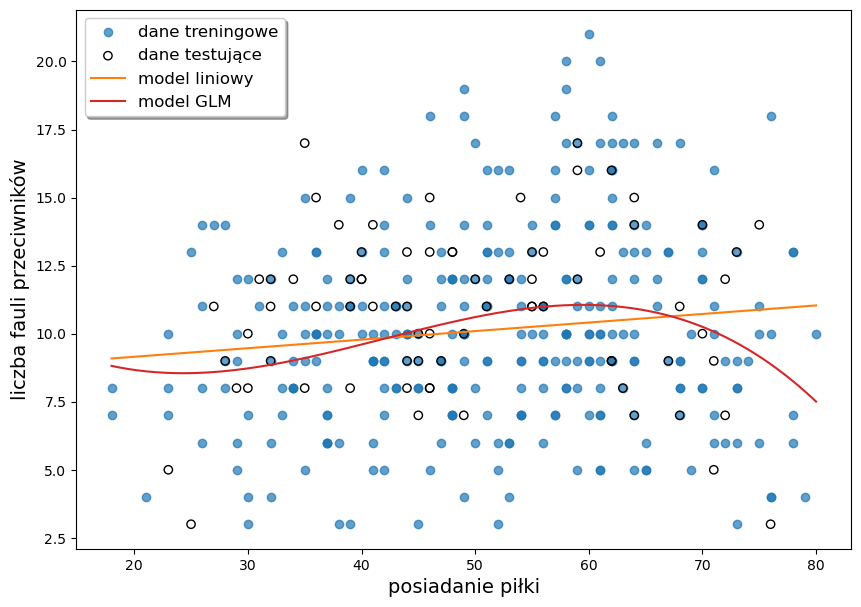

Parametry modelu liniowego: [0.03143], 8.52269
Błąd średniokwadratowy dla danych testowych: 9.39

Błąd średniokwadratowy dla danych treningowych: 12.7

Parametry modelu GLM: [ 0.000e+00 -4.992e-01  1.450e-02 -1.000e-04], 13.78565
Błąd średniokwadratowy dla danych testowych: 8.85

Błąd średniokwadratowy dla danych treningowych: 12.7



In [96]:
draw_plot(df['home_team_possession'].values, df['away_team_fouls'].values, 3, 'posiadanie piłki', 'liczba fauli przeciwników')

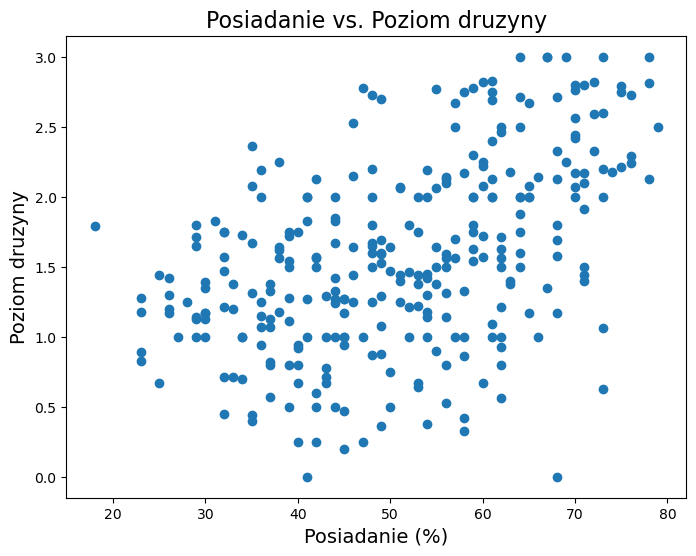

In [103]:
# skkiping first few matchdays, to make points average better
df_limited = df.iloc[80:]

plt.figure(figsize=(8, 6))
plt.scatter(df_limited['home_team_possession'], df_limited['Pre-Match PPG (Home)'])
plt.xlabel('Posiadanie (%)', fontsize=14)
plt.ylabel('Poziom druzyny', fontsize=14)
plt.title('Posiadanie vs. Poziom druzyny', fontsize=16)
plt.show()

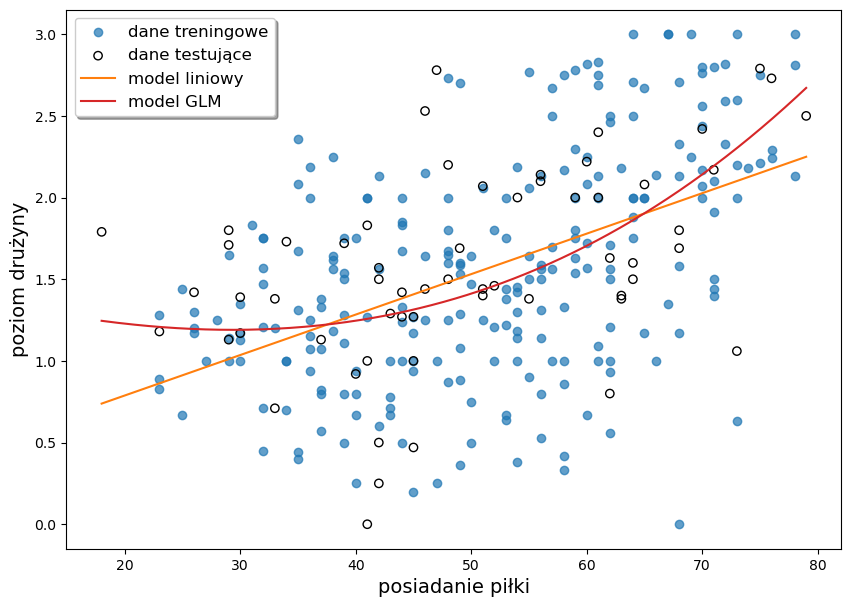

Parametry modelu liniowego: [0.02477], 0.29257
Błąd średniokwadratowy dla danych testowych: 0.296

Błąd średniokwadratowy dla danych treningowych: 0.359

Parametry modelu GLM: [ 0.     -0.0198  0.0002  0.    ], 1.51629
Błąd średniokwadratowy dla danych testowych: 0.276

Błąd średniokwadratowy dla danych treningowych: 0.359



In [141]:
draw_plot(df_limited['home_team_possession'].values, df_limited['Pre-Match PPG (Home)'].values, 3, 'posiadanie piłki', 'poziom drużyny')

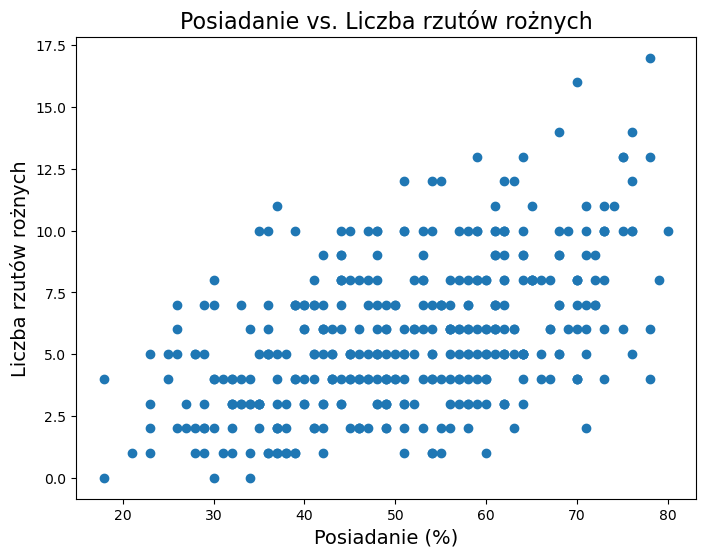

In [49]:

plt.figure(figsize=(8, 6))
plt.scatter(df['home_team_possession'], df['home_team_corner_count'])
plt.xlabel('Posiadanie (%)', fontsize=14)
plt.ylabel('Liczba rzutów rożnych', fontsize=14)
plt.title('Posiadanie vs. Liczba rzutów rożnych', fontsize=16)
plt.show()

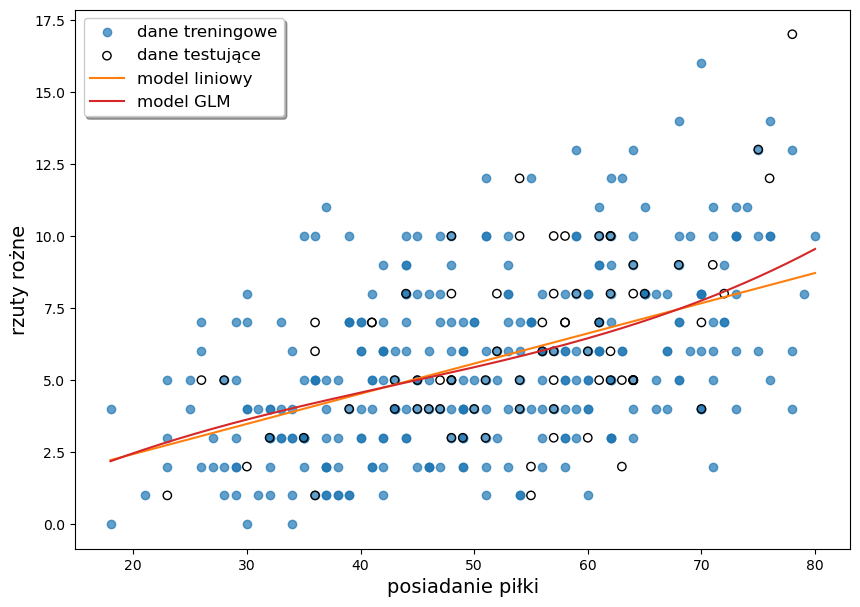

Parametry modelu liniowego: [0.1047], 0.33929
Błąd średniokwadratowy dla danych testowych: 6.54

Błąd średniokwadratowy dla danych treningowych: 6.97

Parametry modelu GLM: [ 0.      0.2528 -0.0039  0.    ], -1.29023
Błąd średniokwadratowy dla danych testowych: 6.3

Błąd średniokwadratowy dla danych treningowych: 6.97



In [62]:
draw_plot(df['home_team_possession'].values, df['home_team_corner_count'].values, 3, 'posiadanie piłki', 'rzuty rożne')

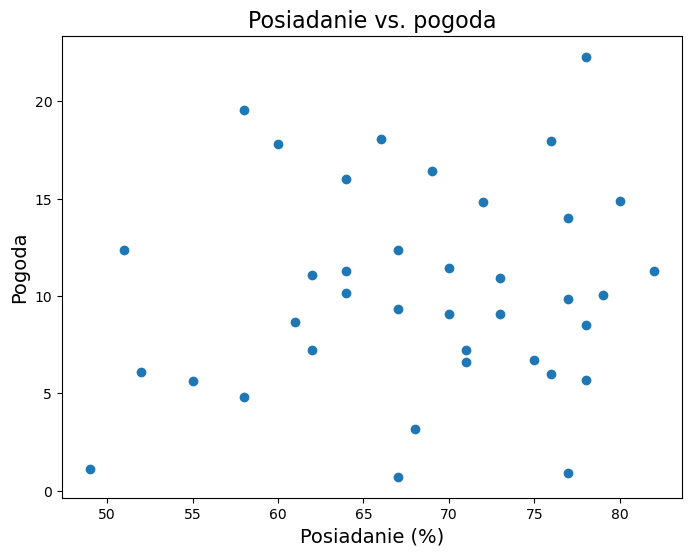

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(man_city_df['possession'], man_city_df['weather'])
plt.xlabel('Posiadanie (%)', fontsize=14)
plt.ylabel('Pogoda', fontsize=14)
plt.title('Posiadanie vs. pogoda', fontsize=16)
plt.show()

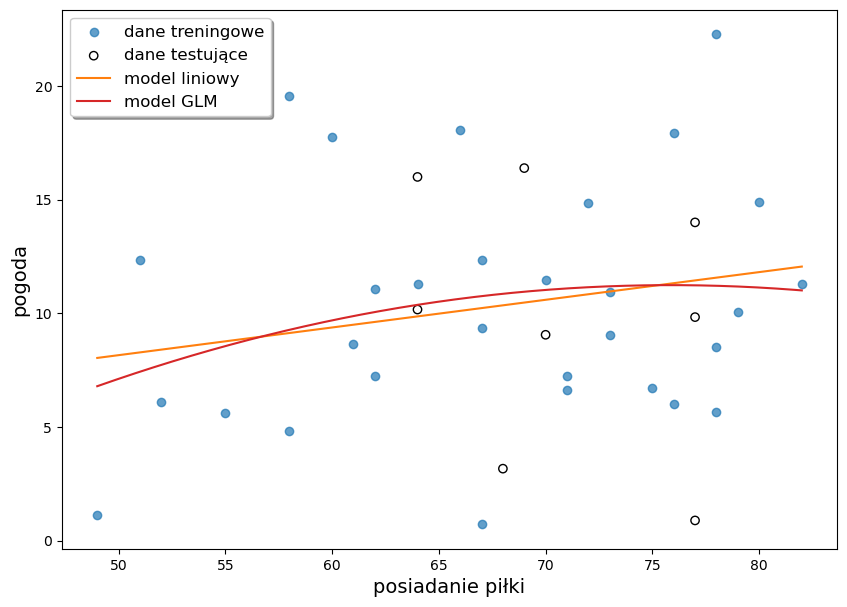

Parametry modelu liniowego: [0.12178], 2.07017
Błąd średniokwadratowy dla danych testowych: 30.9

Błąd średniokwadratowy dla danych treningowych: 25.3

Parametry modelu GLM: [ 0.      0.9351 -0.0062], -24.2291
Błąd średniokwadratowy dla danych testowych: 30.1

Błąd średniokwadratowy dla danych treningowych: 25.3



In [180]:
draw_plot(man_city_df['possession'].values, man_city_df['weather'].values, 2, 'posiadanie piłki', 'pogoda')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


features = df[['home_ppg', 'team_a_xg', 'home_team_shots_on_target']]#, 'home_team_corner_count']]
target = df['home_team_possession']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("R2 score (Regresja liniowa):", accuracy)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_r2_score = r2_score(y_test, linear_predictions)


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2_score = r2_score(y_test, rf_predictions)

print("R2 score (Las losowy):", rf_r2_score)

R2 score (Regresja liniowa): 0.5769812060603708
R2 score (Las losowy): 0.5283155583205974


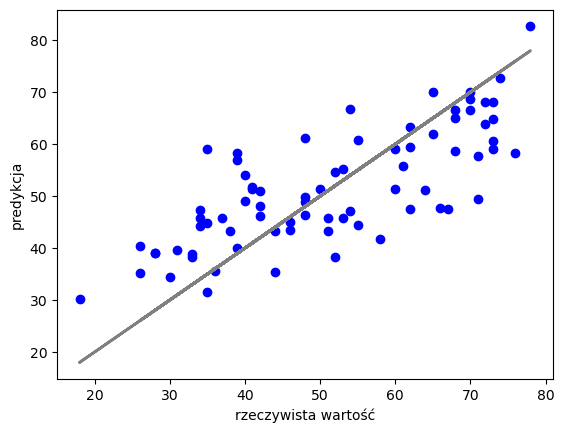

In [6]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='gray', linewidth=2)
plt.xlabel('rzeczywista wartość')
plt.ylabel('predykcja')
plt.show()

In [7]:
new_data1 = [[1.8, 2.1, 4]]
new_data2 = [[0.5, 1, 1]]

# some manual ball possession prediction
possession_prediction1 = linear_model.predict(new_data1)
possession_prediction2 = linear_model.predict(new_data2)

print("Predykcja posiadania piłki:", possession_prediction1)
print("Predykcja posiadania piłki:", possession_prediction2)

Predykcja posiadania piłki: [70.63386013]
Predykcja posiadania piłki: [41.41133753]


C:\Users\domin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\domin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
def classify_possession(percentage):
    if percentage <= 51-13:
        return 'Small'
    elif percentage <= 51+13:
        return 'Medium'
    else:
        return 'High'

df['possession_classification'] = df['home_team_possession'].apply(classify_possession)

print(df)

                  date_GMT     home_team_name           away_team_name  home_team_possession  away_team_possession  home_team_goal_count  team_a_xg  home_team_fouls  away_team_fouls  home_team_shots_on_target  home_team_corner_count  home_ppg  Pre-Match PPG (Home) possession_classification
0     Aug 10 2018 - 7:00pm  Manchester United           Leicester City                    46                    54                     2       1.25               11                8                          7                       2      1.89                  0.00                    Medium
1    Aug 11 2018 - 11:30am   Newcastle United        Tottenham Hotspur                    40                    60                     1       1.18               11               12                          3                       3      1.32                  0.00                    Medium
2     Aug 11 2018 - 2:00pm    AFC Bournemouth             Cardiff City                    62                    38             

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df[['home_ppg', 'team_a_xg', 'home_team_shots_on_target']]

y = df['possession_classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      0.14      0.25        21
      Medium       0.56      0.95      0.70        37
       Small       0.80      0.44      0.57        18

    accuracy                           0.61        76
   macro avg       0.79      0.51      0.51        76
weighted avg       0.74      0.61      0.55        76



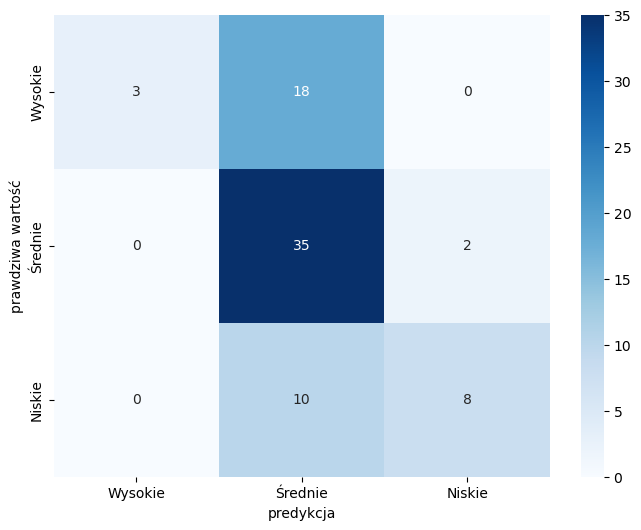

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_names = ['Wysokie', 'Średnie', 'Niskie']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('predykcja')
plt.ylabel('prawdziwa wartość')

plt.show()